## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics
 
# 分類問題，使用DecisionTreeClassifier,回歸問題，使用DecsionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
# 讀取資料
iris = datasets.load_iris()

# 切分訓練/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.25,random_state=4)

Accuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0. 0. 0. 1.]
[[0.         0.02857143 0.97142857]
 [1.         0.         0.        ]
 [0.         0.02857143 0.97142857]
 [0.         0.02857143 0.97142857]
 [0.         0.02857143 0.97142857]
 [0.         0.91111111 0.08888889]
 [0.         0.91111111 0.08888889]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.91111111 0.08888889]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.91111111 0.08888889]
 [0.         0.02857143 0.97142857]
 [1.         0.         0.        ]
 [0.         0.91111111 0.08888889]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.02857143 0.97142857]
 [1.         0.         0.        ]
 [0.         0.02857143 0.97142857]
 [0.         0.91111111 0.08888889]
 [1.         0.         

C:\Users\Jason\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


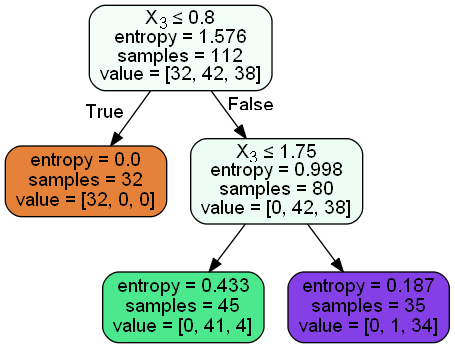

In [3]:
# 建立模型
clf = DecisionTreeClassifier(criterion='entropy',max_depth=2)

# 訓練模型
clf.fit(x_train,y_train)

# 預測測試集
y_pred = clf.predict(x_test)

# 準確率
acc = metrics.accuracy_score(y_test,y_pred)
print("Accuracy: ",acc)

# 特徵名稱
print(iris.feature_names)

# 特徵重要度
print("Feature importance: ", clf.feature_importances_)

# 預測結果
print(clf.predict_proba(x_test))

# 畫決策樹
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,
                rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())



In [4]:
from sklearn.linear_model import LogisticRegression
# 建立模型
Lore = LogisticRegression(max_iter=10000)

# 訓練模型
Lore.fit(x_train,y_train)

# 預測測試集
y_pred = Lore.predict(x_test)

# 準確率
acc = metrics.accuracy_score(y_test,y_pred)
print("Accuracy: ",acc)

# 特徵名稱
print(iris.feature_names)

# 預測結果
print(Lore.predict_proba(x_test))

Accuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[2.00836817e-05 4.33238096e-02 9.56656107e-01]
 [9.27365631e-01 7.26341318e-02 2.37463567e-07]
 [2.40609157e-06 4.21595400e-02 9.57838054e-01]
 [1.54202152e-07 7.64315238e-03 9.92356693e-01]
 [1.44519406e-06 3.05849573e-02 9.69413598e-01]
 [6.62817733e-03 7.93839106e-01 1.99532716e-01]
 [6.41135603e-04 3.44244622e-01 6.55114243e-01]
 [9.76603350e-01 2.33966377e-02 1.23315527e-08]
 [9.51449598e-01 4.85501415e-02 2.60472094e-07]
 [7.32693046e-04 4.77399120e-01 5.21868187e-01]
 [9.28646885e-01 7.13528168e-02 2.98062824e-07]
 [9.62603858e-01 3.73959783e-02 1.63361677e-07]
 [9.61009614e-01 3.89903030e-02 8.25789933e-08]
 [3.79016809e-03 7.62278910e-01 2.33930922e-01]
 [3.47548291e-04 1.43246688e-01 8.56405763e-01]
 [9.52542948e-01 4.74568943e-02 1.57685432e-07]
 [6.53198966e-02 9.24523837e-01 1.01562665e-02]
 [9.76983838e-01 2.30161125e-02 4.98360335e-08]
 [9.32070692e-01 6.7928